# Graduate Presentation - Gas Dynamics Package

## Shock Wave Analysis:
The gas_dynamics package has the capability to analyze flow conditions before and after shock waves.

Import `gas_dynamics` package.

In [1]:
import gas_dynamics as gd

### Normal Shock Waves

A normal shock is a shock wave with an angle of exactly $90^{\circ}$.

The function `gd.shock_mach` allows us to calculate the Mach after a normal shock, aka M2.

Use the function in the form `gd.shock_mach`(mach=`float` , gas=`fluid` ).

- The input "mach" is the Mach upstream of the normal shock , aka M1.
- The input for gas is a `fluid` object defined by the package (i.e. air, argon, helium, etc.).
    - For example, air would be `gd.fluids.air`.
    - If no gas type is given, the defualt is air.

In [2]:
M2 = gd.shock_mach(mach=1.5) 
M2

0.7010887416930995

Similarly, the command `gd.shock_mach_before` takes the downstream Mach and returns the Mach upstream of a normal shock.

In [3]:
M1 = gd.shock_mach_before(mach=M2)
M1

1.4999999999999998

- Here , M1 is equal to a float of $\approx 1.5$ which is the same Mach used to find M2!

We can also use `gd.shock_pressure_ratio` to determine the pressure ratio $\frac{P_2}{P_1}$. 

- P2 denotes the pressure after the normal shock, and P1 is the pressure before the normal shock.

- Calculating pressure ratios is beneficial for shock analysis as it allows for the use of isentropic relations.

Use the format `gs.shock_pressure_ratio`(mach=`float` , gas=`fluid` ). Where the default gas is air.

Same format as Mach calculations.

In [4]:
p2_p1 = gd.shock_pressure_ratio(mach=1.5)
p2_p1

2.4583333333333335

Similar to what we did before, the Mach number before a shock can also be used to find the pressure ratio.

In [5]:
M1 = gd.shock_mach_from_pressure_ratio(p2_p1)
M1

1.5

- Given the pressure ratio found previously M1=1.5 , equivalent to the input Mach used previously! 

Same as for pressure ratio, the gas_dynamics package can also calculate temperature ratio $\frac{T_2}{T_1}$.

Same format as before, `gd.shock_temperature_ratio`(mach=`float` , gas=`fluid`).

In [6]:
T2_T1 = gd.shock_temperature_ratio(mach=1.5)
T2_T1 

1.320216049382716

In shock analysis, stagnation conditions are essential. The gas_dynamics package accounts for this as well.

The function `gd.shock_stagnation_pressure_ratio` can be used in a similar way as previously mentioned.

- Format: `gd.shock_stagnation_pressure_ratio`(mach=`float`,gas=`fluid`), returns $\frac{P_{t2}}{P_{t1}}$ as a float.

- Note: There is no function for stagnation temperature since it is constant over a normal shock. 
    - It is constant because the process is adiabatic.

In [7]:
pt2_pt1 = gd.shock_stagnation_pressure_ratio(mach=2)
pt2_pt1

0.7208738614847454

Ratio tables are commonly used in shock analysis for ease of use. 

A table of the aforementioned ratios can be generated using:

`gd.shock_tables`(mach_range=`list` , step=`float` , gas=`fluid`)

Notes:
- Mach range is a list of Mach numbers in the form [`float` , `float`].
    - The first value in this list is minimum Mach and second value is maximum Mach.
- Step is the step size between each entry.
- Same as before, defualt gas is air.
- The tabulated value for dV/a describes the velocity change divided by speed of sound.

In [8]:
shock_table = gd.shock_tables(range=[1,2], step=0.1)
shock_table

Normal Shock Parameters for Air, γ = 1.4
M: 1.00   |   M2: 1.0000   |    p2/p1: 1.0000   |    T2/T1: 1.0000   |   dV/a: 0.0000   |   pt2/pt1: 1.000000
M: 1.10   |   M2: 0.9118   |    p2/p1: 1.2450   |    T2/T1: 1.0649   |   dV/a: 0.1591   |   pt2/pt1: 0.998928
M: 1.20   |   M2: 0.8422   |    p2/p1: 1.5133   |    T2/T1: 1.1280   |   dV/a: 0.3056   |   pt2/pt1: 0.992798
M: 1.30   |   M2: 0.7860   |    p2/p1: 1.8050   |    T2/T1: 1.1909   |   dV/a: 0.4423   |   pt2/pt1: 0.979374
M: 1.40   |   M2: 0.7397   |    p2/p1: 2.1200   |    T2/T1: 1.2547   |   dV/a: 0.5714   |   pt2/pt1: 0.958194
M: 1.50   |   M2: 0.7011   |    p2/p1: 2.4583   |    T2/T1: 1.3202   |   dV/a: 0.6944   |   pt2/pt1: 0.929787
M: 1.60   |   M2: 0.6684   |    p2/p1: 2.8200   |    T2/T1: 1.3880   |   dV/a: 0.8125   |   pt2/pt1: 0.895200
M: 1.70   |   M2: 0.6405   |    p2/p1: 3.2050   |    T2/T1: 1.4583   |   dV/a: 0.9265   |   pt2/pt1: 0.855721
M: 1.80   |   M2: 0.6165   |    p2/p1: 3.6133   |    T2/T1: 1.5316   |   dV/a: 

### Oblique Shocks

Oblique shocks are similar to normal shocks, but at an angle $\neq 90^{\circ}$.

We can calculate the shock angle with a given upstream Mach number, the deflection angle, and type of gas.
- Default gas is air.

Format: `gd.shock_angle`(mach=`float` , flow_deflection=`float` , gas=`fluid`).

Notes: 
- The function returns two angles as a list, the first is for weak shocks and the second is for strong shocks.
- The flow_deflection defines the angle that the fluid turns due to the shock.

In [9]:
shock_angles = gd.shock_angle(mach=2, flow_deflection=10)
shock_angles

[39.31393184481759, 83.70008037574696]

Similar to normal shocks, we can use shock angle to solve for upstream shock, given a deflection angle.

- i.e. `gd.shock_mach_given_angles`(shock_angle=`float` , flow_deflection=`float` , gas=`fluid`)

In [10]:
M1 = gd.shock_mach_given_angles(shock_angles[1], flow_deflection=10)
M1

1.9999999999999978

- Given the strong shock angle found above, the function returns a Mach $\approx 2$ , which was the input Mach before!

We can also use the gas_dynamics package to generate helpful plots for oblique shocks.

Format: `gd.shock_oblique_charts`(mach_max=`float` , gas=`fluid` , points=`float` , dark=`bool`)

Notes:
- Inputs are the maximum Mach number, type of gas, number of points, and a boolean value for dark mode.
    - defaults: mach_max=`6`, gas=`air`, points=`60000`, dark=`True`.

100% complete 


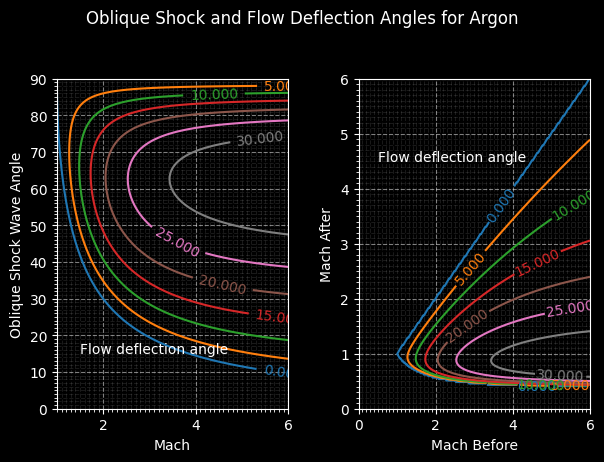

In [11]:
gd.shock_oblique_charts(mach_max=6, gas= gd.fluids.argon, points=50000)

### References
- Shock Analysis: https://gas-dynamics.readthedocs.io/en/latest/shocks/gas_dynamics.shocks.html#